# ANÁLISE DE TRANSFERÊNCIA DE CALOR POR CONDUÇÃO BIDIMENSIONAL ATRAVÉS DO MÉTODO DOS VOLUMES FINITIOS - MFV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1) Defininindo as dimensões do domínio

In [ ]:
length = 20         # Comprimento [m]
heigth = 2*length   # Altura [m]
delta = 1        # Dimensão do elemento de malha [m]
espessura = 1       # Espessura do material isolante ou material alternativo [m]

xmin = 0            # Posição x = 0 (origem) no eixo x, plano x=y
xmax = length       # Posição x máximo da geometria/domínio no eixo x, plano x-y
ymin = 0            # Posição y = 0 (origem) do eixo y, plano x-y
ymax = heigth       # Posição y máximo da geometria/domínio no eixo x, plano x-y

xmin_concreto = espessura         # Posição x mínino do material interno no eixo x, plano x-y
xmax_concreto = xmax - espessura  # Posição x máximo do material interno no eixo x, plano x-y
ymin_concreto = espessura         # Posição y mínimo do material interno no eixo y, plano x-y
ymax_concreto = ymax - espessura  # Posição y máxima do material interno no eixo y, plano x-y

## 1.2) Discretização do domínio e criação da malha computacional

In [ ]:
n=int(length/delta) # Número de elementos da malha em cada eixo ortogonal. Malha uniforme com o mesmo número de elementos em ambas direções x-y.

#MATRIZ GLOBAL DE POSIÇÃO (X,Y) DO CENTRO DE CADA ELEMENTO DA MALHA

x0 = delta / 2                                # Posição x0 do centro do elemento 1, posição (x0, y0)
y0 = delta / 2                                # Posição y0 do centro do elemento 1, posição (x0, y0)

matriz_posicao = []                           # Inicialização da matriz global de posição do centro de cada elemento da malha


# Faz-se uma varredura do domínio entre os limites geométricos 0 e n, através dos sub-índices i e j, representando respectivamente os eixos x e y.
# Cada par de valores [i,j] representa o centro (x,y) de um volume finito. Exemplo: para i = j = 0, [0,0] representa o volume finito da linha 0, coluna 0. Para i = 0 e j = 1, [0,1] representa o volume finito da linha 0 e coluna 1.
# Exemplo para o primeiro laço/loop:

for i in range(n):                          # Para i = 0 (primeira linha do domínio, i = 0)
    matriz_posicao.append([])               # Cria-se uma nova matriz [], a qual será a primeira sub-matriz da matriz global de posição, e que irá conter a posição do centro de todos os elementos da primeira linha (i = 0). Aqui, esta sub-matriz para i = 0 representa a primeira linha de elementos da malha. Para o próximo loop, quando i = 1, a subatriz criada representara a segunda linha de elementos. E assim por diante, até i = (n-1), onde teremos uma matriz global de posição com n sub-matrizes, cada uma representando uma linha de n volumes finitos.
    y = (i*delta + y0)                      # Quando y = 0, define-se a posição y do centro de cada elemento da primeira linha: y = (0 * delta + y0) = y0 = delta/2

    for j in range(n):                      # Agora, cria-se a posição do centro dos volumes finitos de todas as colunas presentes na primeira linha (linha i = 0). Para j = 0:
        x = (j*delta + x0)                  # Posição x do volume finito [0,0]: x = (0 * delta + x0) = delta/2
        matriz_posicao[i].append((x,y))     # Cria-se o par de coordenadas (x,y) representando o centro do volume finito [0,0].

                                            # Repete-se o loop variando o valor de j = 0 até (n-1) para toda a primeira linha, i = 0, criando as coordenadas dos centros de todos os volumes finitos da primeira linha do domínio.
                                            # Em seguida, ao finalizar o loop de j para i = 0, inicia-se o loop de i = 1 e todo o procedimento é realizado novamente, mapeando agora, os centros dos volumes finitos de toda a linha i = 1.
                                            

Domínio Discretizado para n = 7

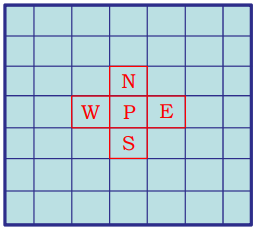

## 1.3) Modelamento Matemático

A equação que representa o fenômeno físico envolvido é a EQUAÇÃO DA DIFUSÃO DE CALOR 2D:

Equação 1: $\frac{\partial }{\partial x} \left ( k \frac{\partial T}{\partial x}  \right ) + \frac{\partial }{\partial y} \left ( k \frac{\partial T}{\partial y}  \right ) + S = 0 \left [ \frac{W}{m^3} \right ]$

Volumes Finitos

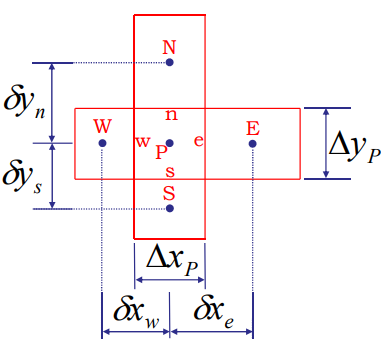

Integrando a equação 1 no volume $\Delta x\Delta y\Delta z$ com $\Delta z = 1$, ou seja, integrando entre os limites:

$w \leq x \leq e$

$s \leq y\leq n$


$\int_{w}^{e}\int_{s}^{n}\frac{\partial }{\partial x} \left ( k \frac{\partial T}{\partial x}  \right )dydx + \int_{w}^{e}\int_{s}^{n}\frac{\partial }{\partial y} \left ( k \frac{\partial T}{\partial y}  \right )dydx + \int_{w}^{e}\int_{s}^{n}S\ dydx = 0$

$\left [ \left ( k \frac{\partial T}{\partial x}  \right )_{e} - \left ( k \frac{\partial T}{\partial x}  \right )_{w} \right ]\int_{s}^{n} dy + \left [ \left ( k \frac{\partial T}{\partial y}  \right )_{n} - \left ( k \frac{\partial T}{\partial y}  \right )_{s} \right ]\int_{w}^{e} dx  + \bar{Sp} \Delta x_{p}\Delta y_{p} = 0$

$\left [ \left ( k \frac{\partial T}{\partial x}  \right )_{e} - \left ( k \frac{\partial T}{\partial x}  \right )_{w} \right ]\Delta y_{p} + \left [ \left ( k \frac{\partial T}{\partial y}  \right )_{n} - \left ( k \frac{\partial T}{\partial y}  \right )_{s} \right ]\Delta x_{p}  + \bar{Sp} \Delta x_{p}\Delta y_{p} = 0$

Assume-se que a temperatura varia de forma linear no interior do volume finito, de modo que as derivadas da equação acima podem ser aproximadas através do Método das Diferenças Finitas. Já o termo fonte, que pode assumir qualquer função, é representado através de uma função por partes:

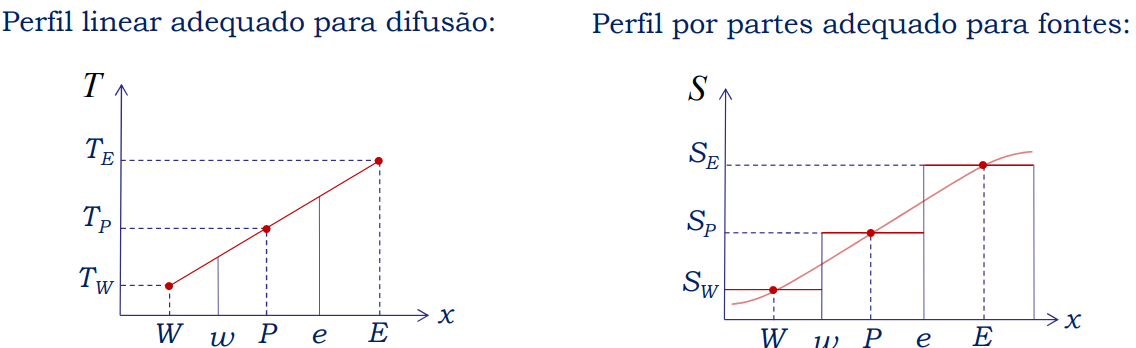

$\left [ k_{e} \frac {T_{E}-T_{P}}{\delta x_{e}} - k_{w} \frac {T_{P}-T_{W}}{\delta x_{w}} \right ]\Delta y_{p} + \left [ k_{s} \frac {T_{N}-T_{P}}{\delta y_{n}} - k_{s} \frac {T_{P}-T_{S}}{\delta y_{s}} \right ]\Delta x_{p} + \bar{Sp} \Delta x_{p}\Delta y_{p} = 0$

$\left ( k_{e} \frac {\Delta y_{p}}{\delta x_{e}} \right )T_{E} + \left ( k_{w} \frac {\Delta y_{p}}{\delta x_{w}} \right )T_{W} + \left ( k_{n} \frac {\Delta x_{p}}{\delta y_{n}} \right )T_{N} + \left ( k_{s} \frac {\Delta x_{p}}{\delta y_{s}} \right )T_{S} + \bar{Sp} \Delta x_{p}\Delta y_{p} 
= \left ( k_{e} \frac {\Delta y_{p}}{\delta x_{e}} + k_{w} \frac {\Delta y_{p}}{\delta x_{w}} + k_{n} \frac {\Delta y_{p}}{\delta y_{n}} + k_{s} \frac {\Delta y_{p}}{\delta y_{s}} \right  )T_{P}$

Onde o termo fonte é linearizado através de:

$\bar{Sp} = Sc + S_{P}T_{P}$

E por fim:

Equação 2: $a_{E} T_{E} + a_{W} T_{W} + a_{N} T_{N} + a_{S} T_{S} + b = a_{P} T_{P}$

Onde:

$a_{P} = a_{E} + a_{W} + a_{N} + a_{S} + b$

$b = Sc\Delta x_{P}\Delta y_{P}$

## 1.4) Condições Iniciais e Condições de Contorno

Existem 3 tipos de condições de contorno:

1) Temperatura prescrita (1ª espécie ou Dirichlet): $T_{F}$

2) Fluxo de calor prescrito (2ª espécie ou Neumann): $q_{F}"$

3) h (ou hm, hrad) e $T_{\infty}$ (ou $f_{\infty}$, $T_{VIZ}$) prescritos (3ª espécie ou Robin): convecção, concentração e radiação.

In [ ]:
tprescrito = 23             # Condição de contorno, temperatura prescrita, [K]
tinicial = 22               # Condição inicial, temperatura inicial, [K]
t_inf = 22                  # Condição de contorno de transf. de calor por convecção, temperatura do fluido, Tinf, [K]
h = 10                      # Condição de contorno de transf. de calor por convecção, coeficiente convectivo, h, [W/m²K]

## 1.5) Condutividades Térmicas

Considera-se que k = kP para 

xP ≤ x < xe

e 

k = kE

para 

xe < x ≤ xE.

Neste caso, pode-se determinar o fluxo de calor na interface “e” pelo conceito e
resistências térmicas:

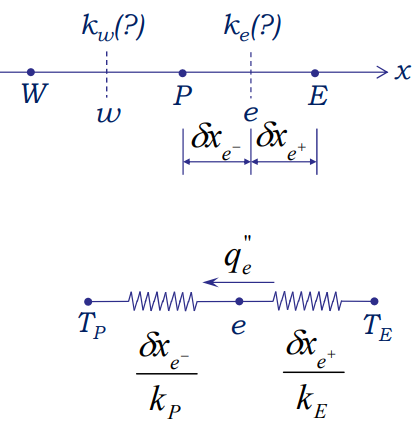

In [ ]:


kaco = 63.9                                   # Condutividade térmica do material isolante ou alternativo, aço, [W/mK]
kconcreto = 0.1                               # Condutividade térmica do material base, concreto, [W/mK]
kenv = (2*kaco*kconcreto)/(kaco+kconcreto)    # Condutividade térmica interface, aço-concreto, [W/mK]

## 1.6) Solução Numérica Iterativa por Jacobi

Método da classe ponto-a-ponto, que resolve o sistema linear formado pela equação 2 aplicada em cada volume finito, visitando equação por equação, iterativamente, usando os valores das variáveis do nível iterativo anterior:

$a_{P}T_{P}^{k+1} = a_{W}T_{W}^{k} + a_{E}T_{E}^{k} + a_{S}T_{S}^{k} + a_{N}T_{N}^{k} + b$

Ciclo Iterativo:

1) Estimar o campo inicial da variável;

2) Calcular TP usando a equação acima para todos os pontos do domínio (varredura sequencial do domínio em cada iteração);

3) Verificar a convergência;

4) Repetir o processo até convergir.

In [ ]:
tinicial = 22               # Condição inicial, temperatura inicial, [K]

#MATRIZ TEMPERATURA INICIAL
matriz_tinicial = []
for i in range(n):
    matriz_tinicial.append([])
    for j in range(n):
        matriz_tinicial[i].append(tinicial)
# print(matriz_tinicial)

#MATRIZ DE TEMPERATURAS ITERAÇÃO ATUAL
matriz_t = []
for i in range(n):
    matriz_t.append([])
    for j in range(n):
        matriz_t[i].append(0)

In [ ]:
iteration = 0           # Contador do número de iterações
convergence = 0.001    # Valor do resíduo que define a convergência e solução do problema
converged = 0           # Solução não convergiu, converged = 0. Solução convergiu (resíduo <= convergence), converged = 1.

#MATRIZ RESIDUOS
matriz_residuos = []
for i in range(n):
    matriz_residuos.append([])
    for j in range(n):
        matriz_residuos[i].append(0)
# print(matriz_residuos)

# Abaixo encontra-se o algorítmo utilizado para solução numérica do problema. Faz-se uma varredura de todos os volumes finitos do domínio, onde em cada um deles são calculados os coeficientes e a temperatura Tp.
print('Solving...')
while(converged == 0):
    for i in range(n):
        for j in range(n):
            
            pos_xp = matriz_posicao[i][j][0]
            pos_yp = matriz_posicao[i][j][1]

            if(i == 0):
                tsouth = tprescrito
            else:
                if(iteration == 0):
                    tsouth = matriz_tinicial[i-1][j]
                else:
                    tsouth = matriz_t[i-1][j]

            if(i == n-1):
                tnorth = 0
            else:
                if(iteration == 0):
                    tnorth = matriz_tinicial[i+1][j]
                else:
                    tnorth = matriz_t[i+1][j]

            if(j == 0):
                twest = 0
            else:
                if(iteration == 0):
                    twest = matriz_tinicial[i][j-1]
                else:
                    twest = matriz_t[i][j-1]

            if(j == n-1):
                teast = 0
            else:
                if(iteration == 0):
                    teast = matriz_tinicial[i][j+1]
                else:
                    teast = matriz_t[i][j+1]

            if(j<n-1):
                pos_xeast = matriz_posicao[i][j+1][0]
                pos_yesat = matriz_posicao[i][j+1][1]

            if(j>0):
                pos_xwest = matriz_posicao[i][j-1][0]
                pos_ywest = matriz_posicao[i][j-1][1]
    
            if(i<n-1):
                pos_xnorth = matriz_posicao[i+1][j][0]
                pos_ynorth = matriz_posicao[i+1][j][1]
    
            if(i>0):
                pos_xsouth = matriz_posicao[i-1][j][0]
                pos_ysouth = matriz_posicao[i-1][j][1]

            #LINHA BOTTOM
            if (i == 0):
                if (j == 0):
                    asouth = (kaco*delta)/(delta/2) #Temperatura prescrita
                    awest = 0 #Adiabático, fluxo de calor = 0
                    aeast = kaco
                    anorth = kaco

                    Sc = 0
                    Sp = 0

                    b = Sc*delta*delta

                    ap = awest + aeast + anorth + asouth - Sp*delta*delta
                    tp = (asouth*tsouth + aeast*teast + anorth*tnorth + b)/ap
                    told = matriz_t[i][j]
                    matriz_t[i][j] = tp
    
                if (j == n-1):
                    asouth = (kaco*delta)/(delta/2) #Temperatura prescrita
                    awest = kaco
                    anorth = kaco
                    aeast = 0

                    Sc = (t_inf)/( ( (1/h)+(delta/(2*kaco)) ) * delta) 
                    Sp = (-1) / ( ( (1/h) + (delta/(2*kaco)) ) * delta)

                    b = Sc*delta*delta
                    
                    ap = aeast + awest + anorth + asouth - Sp*delta*delta

                    tp = (aeast*teast + awest*twest + anorth*tnorth + asouth*tsouth + b)/ap

                    told = matriz_t[i][j]
                    matriz_t[i][j] = tp
    
                if 0 < j < (n-1):
                    awest = kaco
                    aeast = kaco

                    #anorth
                    if pos_xp < espessura and pos_xnorth <= espessura:
                        anorth = kaco
                    elif pos_xp < espessura and pos_xnorth > espessura:
                        anorth = kenv

                    asouth = (kaco*delta)/(delta/2) #Temperatura prescrita

                    Sc = 0
                    Sp = 0

                    b = Sc*delta*delta

                    ap = aeast + awest + anorth + asouth - Sp*delta*delta
                    tp = (awest*twest + aeast*teast + anorth*tnorth + asouth*tsouth + b)/ap
                    told = matriz_t[i][j]
                    matriz_t[i][j] = tp
    
            #LINHA TOP
            if (i == n-1):
                if (j == 0):
                    asouth = kaco
                    awest = 0
                    aeast = kaco
                    anorth = 0

                    Sc = 0
                    Sp = 0

                    b = Sc*delta*delta

                    ap = aeast + awest + anorth + asouth - Sp*delta*delta
                    tp = (aeast*teast + asouth*tsouth + b)/ap
                    told = matriz_t[i][j]
                    matriz_t[i][j] = tp
    
                if (j == n-1):
                    asouth = kaco
                    awest = kaco
                    aeast = 0
                    anorth = 0


                    Sc = (t_inf)/( ( (1/h)+(delta/(2*kaco)) ) * delta) 
                    Sp = (-1) / ( ( (1/h) + (delta/(2*kaco)) ) * delta)
                    
                    b = Sc*delta*delta

                    ap = aeast + awest + anorth + asouth - Sp*delta*delta

                    tp = (awest*twest + asouth*tsouth + b)/ap
                    told = matriz_t[i][j]
                    matriz_t[i][j] = tp
    
                if (0 < j < (n-1)):
                    #asouth
                    if pos_xp > ymax_concreto and pos_xsouth >= ymax_concreto:
                        asouth = kaco
                    elif pos_xp > ymax_concreto and pos_xsouth < ymax_concreto:
                        asouth = kenv
                    awest = kaco
                    aeast = kaco
                    anorth = 0

                    b = 0
                    
                    ap = aeast + awest + anorth + asouth
                    tp = (awest*twest + aeast*teast + asouth*tsouth + b)/ap
                    told = matriz_t[i][j]
                    matriz_t[i][j] = tp
    
            #LINHA WEST INTERNAL
            if(0<i<n-1 and j==0):
                awest = 0
                aeast = kaco
                asouth = kaco
                anorth = kaco

                Sc = 0
                Sp = 0

                b = Sc*delta*delta
                ap = aeast + awest + anorth + asouth - Sp*delta*delta

                tp = (aeast*teast + asouth*tsouth + anorth*tnorth + b)/ap
                told = matriz_t[i][j]
                matriz_t[i][j] = tp
    
            #LINHA EAST INTERNAL
            if(0<i<n-1 and j==n-1):
                awest = kaco
                aeast = 0
                asouth = kaco
                anorth = kaco

                Sc = (t_inf)/( ( (1/h)+(delta/(2*kaco)) ) * delta) 
                Sp = (-1) / ( ( (1/h) + (delta/(2*kaco)) ) * delta)

                b = Sc*delta*delta
                ap = awest + aeast + anorth + asouth - Sp*delta*delta

                tp = (awest*twest + asouth*tsouth + anorth*tnorth + b)/ap
                told = matriz_t[i][j]
                matriz_t[i][j] = tp
    
            #DOMINIO ITERNO
            if (0<i<(n-1) and 0<j<(n-1)):
                #asouth
                if( pos_yp <= ymin_concreto):
                    asouth = kaco
                if( ymin_concreto < pos_yp < ymax_concreto ):
                    if( pos_xp <= xmin_concreto or pos_xp >= xmax_concreto):
                        asouth = kaco
                    if( xmin_concreto < pos_xp < xmax_concreto and pos_ysouth < ymin_concreto):
                        asouth = kenv
                    else:
                        asouth = kconcreto
                if( pos_yp >= ymax_concreto and pos_ysouth < ymax_concreto ):
                    asouth = kenv
                if( pos_yp > ymax_concreto and pos_ysouth >= ymax_concreto ):
                    asouth = kaco
    
                #anorth:
                if( pos_yp >= ymax_concreto):
                    anorth = kaco
                if( ymin_concreto <= pos_yp < ymax_concreto ):
                    if( pos_xp <= xmin_concreto or pos_xp >= xmax_concreto):
                        anorth = kaco              
                    if( xmin_concreto < pos_xp < xmax_concreto and pos_ynorth >= ymax_concreto):
                        anorth = kenv
                    else:
                        anorth = kconcreto
                if( pos_yp <= ymin_concreto and pos_ynorth > ymin_concreto ):
                    anorth = kenv
                if( pos_yp < ymin_concreto and pos_ynorth <= ymin_concreto ):
                    anorth = kaco
    
                #awest
                if(pos_xp <= xmin_concreto):
                    awest = kaco
                if( xmin_concreto < pos_xp <= xmax_concreto):
                    if( pos_yp >= ymax_concreto or pos_yp < ymin_concreto):
                        awest = kaco
                    if( xmin_concreto < pos_xp < xmax_concreto and pos_xwest <= xmin_concreto):
                        awest = kenv
                    else:
                        awest = kconcreto
                if( pos_xp >= xmax_concreto and pos_xwest < xmax_concreto):
                    awest = kenv
                if( pos_xp > xmax_concreto and pos_xwest >= xmax_concreto):
                    awestt = kaco
    
                #aeast
                if( pos_xp >= xmax_concreto):
                    aeast = kaco
                if( xmin_concreto < pos_xp < xmax_concreto ):
                    if( pos_yp >= ymax_concreto or pos_yp <= ymin_concreto):
                        aeast = kaco
                    if( xmin_concreto < pos_xp < xmax_concreto and pos_xeast >= xmax_concreto):
                        aeast = kenv
                    else:
                        aeast = kconcreto
                if( pos_xp <= xmin_concreto and pos_xeast > xmin_concreto):
                    aeast = kenv
                if( pos_xp < xmin_concreto and pos_xeast <= xmin_concreto):
                    aeast = kaco
                b = 0
                ap = awest + aeast + anorth + asouth
                tp = (awest*twest + aeast*teast + asouth*tsouth + anorth*tnorth + b)/ap
                told = matriz_t[i][j]
                matriz_t[i][j] = tp

            res_p = (matriz_t[i][j] - told) / (matriz_t[i][j])
            matriz_residuos[i][j] = res_p
            matriz_residuos_np = np.array(matriz_residuos)
            res_max = np.max(matriz_residuos_np)

    if(res_max >= convergence):
      converged = 0
    else:
      converged = 1
    iteration = iteration + 1

print('Iterations:', iteration)

Solving...
Iterations: 13


## 1.7) Tratando os dados e solução

In [ ]:
z = np.array(matriz_t)
z

array([[22.90752922, 22.9173873 , 22.92530949, 22.92924944, 22.93108355,
        22.93194577, 22.93236044, 22.93256327, 22.93266318, 22.93271214,
        22.93273404, 22.93273345, 22.93268893, 22.93252358, 22.9320257 ,
        22.93065494, 22.92708121, 22.91812733, 22.89680596, 22.85288423],
       [22.73074071, 22.76991181, 22.79443677, 22.8039337 , 22.80816209,
        22.81020041, 22.81122405, 22.81174727, 22.81201555, 22.8121514 ,
        22.81221255, 22.81220823, 22.8120819 , 22.81164266, 22.81039022,
        22.80709954, 22.79880383, 22.7779842 , 22.72325737, 22.64553796],
       [22.54516183, 22.55782291, 22.57572079, 22.58608357, 22.59186435,
        22.59506812, 22.59683707, 22.5978067 , 22.59833187, 22.59860901,
        22.5987354 , 22.59872379, 22.59847066, 22.59765207, 22.59548742,
        22.59026916, 22.57849652, 22.5534189 , 22.50333782, 22.46443892],
       [22.38605759, 22.39134044, 22.40208184, 22.41005355, 22.41531134,
        22.41858231, 22.42054417, 22.42168834, 2

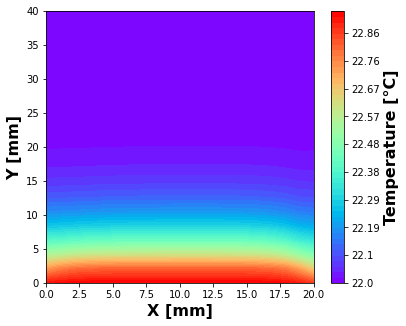

In [ ]:
zmax = np.max(z)
zmin = np.min(z)
x = np.linspace(0, xmax, n)
y = np.linspace(0, ymax, n)

X, Y = np.meshgrid(x, y)
Z = z.reshape(n, n)
v = np.linspace(zmin, zmax, endpoint=True)

fig = plt.figure(figsize=(6,5))
contours = plt.contourf(X, Y, Z, v, cmap='rainbow')

plt.xlabel('X [mm]', fontsize=16, weight="bold")
plt.ylabel('Y [mm]', fontsize=16, weight="bold")

cb = plt.colorbar(contours)
cb.ax.set_ylabel('Temperature [°C]', fontsize = 16, weight="bold")
cb.ax.set_yticklabels(["{:.4}".format(i) for i in cb.get_ticks()])

plt.show()